# Here we input the required libraries and load the dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('D:/Onedrive/OneDrive - GISMA University of Applied Sciences GmbH/Desktop/diabetes_dataset.csv')

In [3]:
df.head(10)

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0
5,2016,Male,66.0,Alabama,0,0,1,0,0,0,0,not current,27.32,5.7,159,0
6,2015,Female,49.0,Alabama,0,0,1,0,0,0,0,current,24.34,5.7,80,0
7,2016,Female,15.0,Alabama,0,0,0,0,1,0,0,No Info,20.98,5.0,155,0
8,2016,Male,51.0,Alabama,1,0,0,0,0,0,0,never,38.14,6.0,100,0
9,2015,Male,42.0,Alabama,0,0,1,0,0,0,0,No Info,27.32,5.7,160,0


# cleaning the data and get a whole view of the structure of data

In [7]:
#do we have null values?
df.isnull().sum()

year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99986 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  99986 non-null  int64  
 1   gender                99986 non-null  object 
 2   age                   99986 non-null  float64
 3   location              99986 non-null  object 
 4   race:AfricanAmerican  99986 non-null  int64  
 5   race:Asian            99986 non-null  int64  
 6   race:Caucasian        99986 non-null  int64  
 7   race:Hispanic         99986 non-null  int64  
 8   race:Other            99986 non-null  int64  
 9   hypertension          99986 non-null  int64  
 10  heart_disease         99986 non-null  int64  
 11  smoking_history       99986 non-null  object 
 12  bmi                   99986 non-null  float64
 13  hbA1c_level           99986 non-null  float64
 14  blood_glucose_level   99986 non-null  int64  
 15  diabetes              99

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,99986.0,2018.360731,1.345312,2015.00,2019.00,2019.00,2019.00,2022.00
age,99986.0,41.885930,22.516409,0.08,24.00,43.00,60.00,80.00
race:AfricanAmerican,99986.0,0.202238,0.401671,0.00,0.00,0.00,0.00,1.00
race:Asian,99986.0,0.200098,0.400075,0.00,0.00,0.00,0.00,1.00
race:Caucasian,99986.0,0.198758,0.399067,0.00,0.00,0.00,0.00,1.00
race:Hispanic,99986.0,0.198898,0.399173,0.00,0.00,0.00,0.00,1.00
race:Other,99986.0,0.200008,0.400008,0.00,0.00,0.00,0.00,1.00
hypertension,99986.0,0.074860,0.263167,0.00,0.00,0.00,0.00,1.00
heart_disease,99986.0,0.039426,0.194606,0.00,0.00,0.00,0.00,1.00
bmi,99986.0,27.320767,6.637248,10.01,23.63,27.32,29.58,95.69


In [9]:
#remove duplicate values
df=df.drop_duplicates()

# is our data balanced or imablanced?
## it is imbalanced to class 0 

In [11]:
#is our data balanced? 
df['diabetes'].value_counts()

diabetes
0    91486
1     8500
Name: count, dtype: int64

C:\Users\Salar\AppData\Local\Temp\ipykernel_24372\87035793.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diabetes', data=df, palette='pastel')


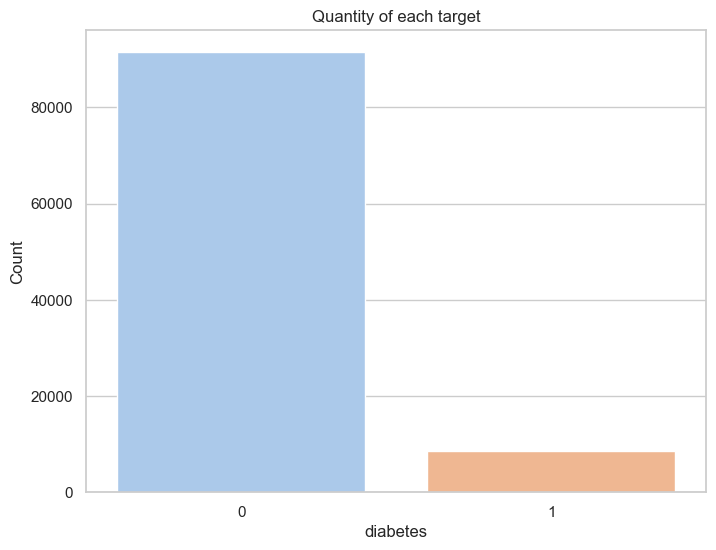

In [13]:
#Visualize the imbalanced/balanced Data
sns.set(style="whitegrid")

# Create a count plot to visualize the target categories
plt.figure(figsize=(8, 6))
sns.countplot(x='diabetes', data=df, palette='pastel')

# Add labels and title
plt.xlabel('diabetes')
plt.ylabel('Count')
plt.title('Quantity of each target')
plt.show()

# perform Explarotary Data analysis for some features of data

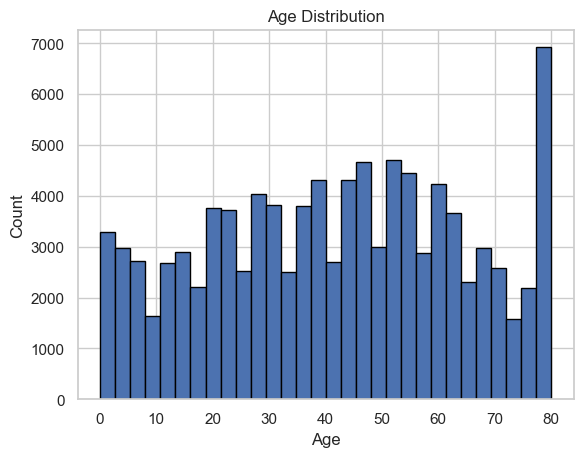

In [19]:
# draw Histogram for age
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

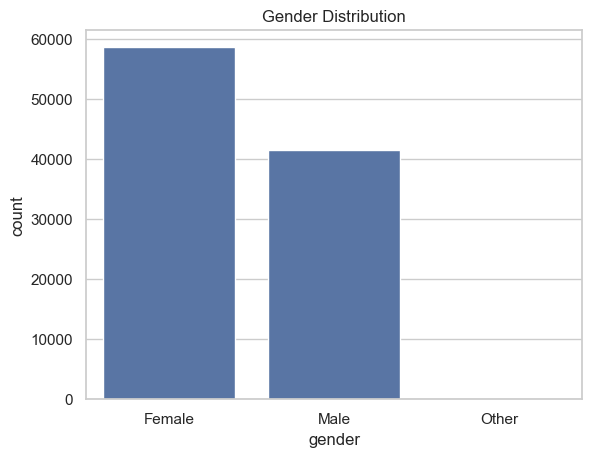

In [21]:
# draw Bar plot for gender
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

C:\Users\Salar\AppData\Local\Temp\ipykernel_24372\1023748953.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'], bins=30)


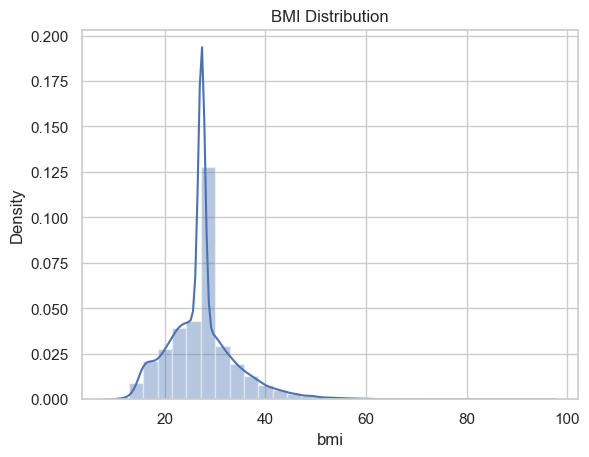

In [23]:
# draw Distribution plot for BMI
sns.distplot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

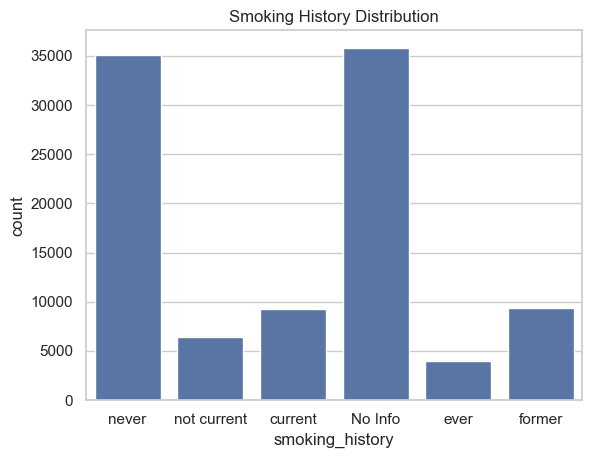

In [25]:
# Count plot for smoking history
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.show()

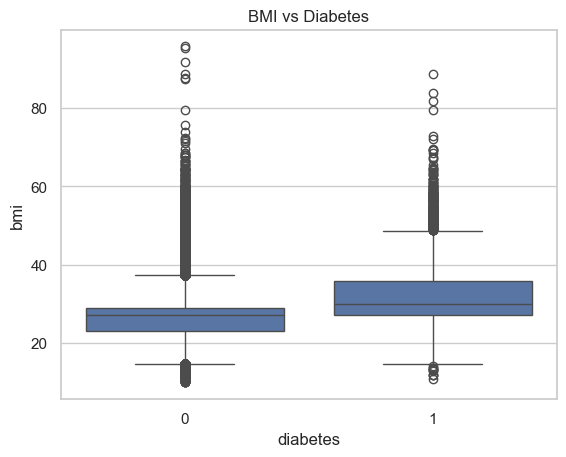

In [27]:
# Boxplot BMI vs Diabetes classification
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs Diabetes')
plt.show()

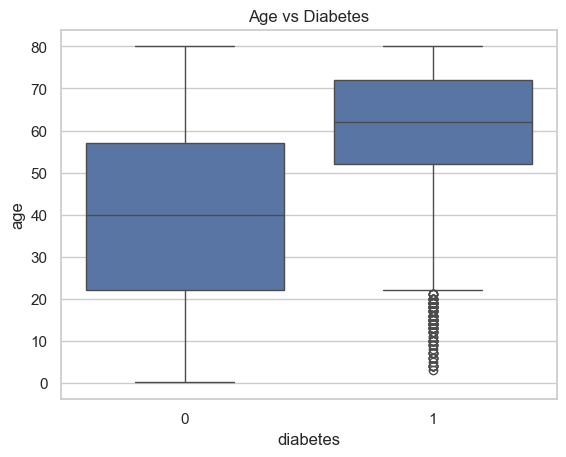

In [29]:
# Boxplot Age vs Diabetes classification
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age vs Diabetes')
plt.show()

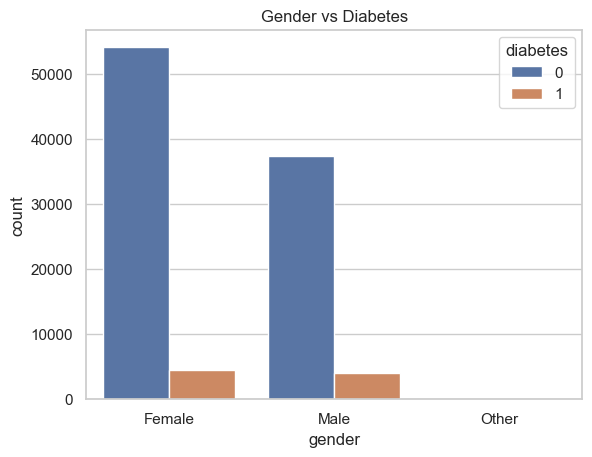

In [31]:
# Count plot of gender vs diabetes
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs Diabetes')
plt.show()

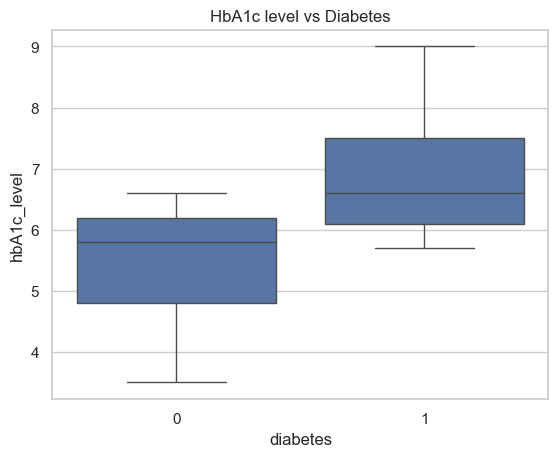

In [35]:
# Boxplot HbA1c level vs Diabetes classification
sns.boxplot(x='diabetes', y='hbA1c_level', data=df)
plt.title('HbA1c level vs Diabetes')
plt.show()

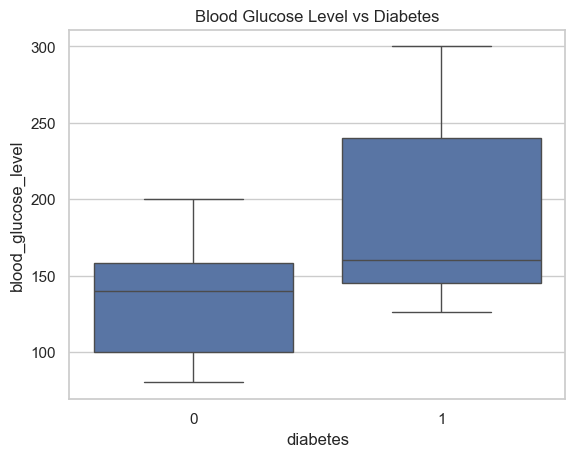

In [37]:
# Boxplot blood glucose level vs Diabetes classification
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

# seperating target feature from all of other features

In [52]:
#target spliting
X=df.drop('diabetes',axis=1)
Y=df['diabetes']

# perfroming a dummy encoding for categorical datas of X 

In [55]:
#dummy encoding where the data is categorical
categorical_columns=X.columns[X.dtypes==object]
X=pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Performing Train_test_split

In [57]:
#train_test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=Y,random_state=21)

# Standardization of dataset for feeding into ML algorithms 
## fit and transform on train dataset ----  just transfrom on test dataset

In [59]:
# do a min_max scaling for a better machine learning process
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# perform PCA as a feature engineering 

In [60]:
#use PCA for feature engineering
from sklearn.decomposition import PCA
pca=PCA(n_components=0.7)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

# while our data is not balanced, we use SMOTE method to oversample the lower class

In [62]:
#the data is imbalance, so we use SMOTE to generate data to the lower class
from imblearn.over_sampling import SMOTE
sm = SMOTE() 
x_train, y_train = sm.fit_resample(x_train, y_train)

# ***now the data is clean and ready for implementing the machine learning algorithms***

## Implementing SVM algorithm through Sk-Learn library

In [67]:
#implementing SVM model and fit on train data
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
model = sklearn.svm.SVC()
sv=model.fit(x_train, y_train);

## calculate the SVM model performance on Train data

In [163]:
# Calculate the performance metrics on train date
y_train_pred_SVM = model.predict(x_train)
accuracy_svm_train = accuracy_score(y_train, y_train_pred_SVM)
precision_svm= precision_score (y_train, y_train_pred_SVM)
recall_svm=recall_score(y_train, y_train_pred_SVM)
f1_svm=f1_score(y_train, y_train_pred_SVM)
roc_auc_svm=roc_auc_score(y_train, y_train_pred_SVM)

# Print the performance metrics for train data
print(f'Accuracy of the SVM model on train data: {accuracy_svm_train:.2f}')
print(f'precision of the SVM model on train data: {precision_svm:.2f}')
print(f'recall of the SVM model on train data: {recall_svm:.2f}')
print(f'f1 of the SVM model on train data: {f1_svm:.2f}')
print(f'roc_auc of the SVM model on train data: {roc_auc_svm:.2f}')


Accuracy of the SVM model on train data: 0.93
precision of the SVM model on train data: 0.91
recall of the SVM model on train data: 0.94
f1 of the SVM model on train data: 0.93
roc_auc of the SVM model on train data: 0.93


In [68]:
# Predict the target for the test set
y_pred = model.predict(x_test)

In [69]:
#Confusion matrix for SVM model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[20538,  2334],
       [  357,  1768]], dtype=int64)

## Calculate the performance of SVM on test data

In [73]:
#evaluate the accuracy of SVM model on test data 
#import accuracy_metric because we have balanced our data earlier
# we will compare all of the performance metrics for this data set based on confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


# Calculate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score (y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_pred)


# Print the performance metrics
print(f'Accuracy of the SVM model(train-test split): {accuracy:.2f}')
print(f'precision of the SVM model(train-test split): {precision:.2f}')
print(f'recall of the SVM model(train-test split): {recall:.2f}')
print(f'f1 of the SVM model(train-test split): {f1:.2f}')
print(f'roc_auc of the SVM model(train-test split): {roc_auc:.2f}')

Accuracy of the SVM model(train-test split): 0.89
precision of the SVM model(train-test split): 0.43
recall of the SVM model(train-test split): 0.83
f1 of the SVM model(train-test split): 0.57
roc_auc of the SVM model(train-test split): 0.86


## Calculate ROC and AUC for SVM 

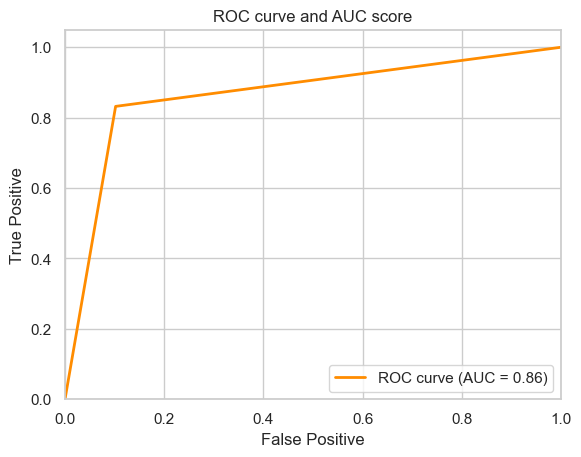

In [75]:
# Compute ROC curve and AUC
from sklearn.metrics import roc_curve, auc
i, l, _ = roc_curve(y_test, y_pred)
roc_auc = auc(i, l)

# Plot the ROC curve 
plt.figure()
plt.plot(i, l, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')


# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC curve and AUC score')
plt.legend(loc='lower right')

# Display the plot
plt.show()

## Validation the SVM model accuracy by using K-fold cross validation 

In [77]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import KFold

In [79]:
kf=KFold(n_splits=5, shuffle=True, random_state=42)
scores=cross_val_score(model,x_train,y_train,cv=kf,scoring='accuracy')
print (scores)

[0.91627195 0.91794797 0.91885885 0.92100565 0.92031335]


In [83]:
print ('Accuracy of SVM by cross-fold-validation is:', scores.mean())

Accuracy of SVM by cross-fold-validation is: 0.918879554900544


## how does our SVM model perform on this data overally? over or underfit 

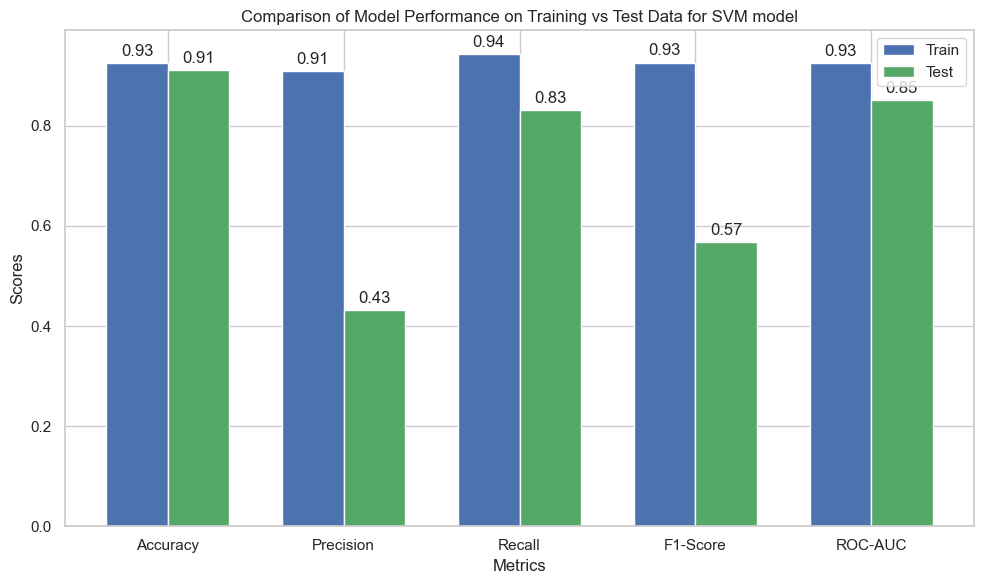

In [185]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Collect the metrics for both training and test sets
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
train_metrics = [accuracy_svm_train, precision_svm, recall_svm, f1_svm, roc_auc_svm]
test_metrics = [accuracy, precision, recall, f1, roc_auc]

# Step 2: Create a bar chart to visualize the comparison
x = np.arange(len(metrics))  # Label locations

# Step 3: Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35  # Width of the bars
train_bar = ax.bar(x - bar_width/2, train_metrics, bar_width, label='Train', color='b')
test_bar = ax.bar(x + bar_width/2, test_metrics, bar_width, label='Test', color='g')

# Step 4: Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance on Training vs Test Data for SVM model')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Step 5: Annotate the bars with the values
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset label
                    textcoords="offset points", ha='center', va='bottom')

annotate_bars(train_bar)
annotate_bars(test_bar)

# Step 6: Show the plot
plt.tight_layout()
plt.show()


# Now we implement the Naive Bayes /NGB/ Model

In [87]:
from sklearn.naive_bayes import GaussianNB
modelgnb = GaussianNB()
gnb=modelgnb.fit(x_train, y_train)

## Calculate the GNB model performance on Train data

In [165]:
# Calculate the performance metrics on train date for GNB
y_train_pred_GNB = modelgnb.predict(x_train)
accuracy_GNB_train = accuracy_score(y_train, y_train_pred_GNB)
precision_GNB= precision_score (y_train, y_train_pred_GNB)
recall_GNB=recall_score(y_train, y_train_pred_GNB)
f1_GNB=f1_score(y_train, y_train_pred_GNB)
roc_auc_GNB=roc_auc_score(y_train, y_train_pred_GNB)

# Print the performance metrics for train data
print(f'Accuracy of the SVM model on train data: {accuracy_GNB_train:.2f}')
print(f'precision of the SVM model on train data: {precision_GNB:.2f}')
print(f'recall of the SVM model on train data: {recall_GNB:.2f}')
print(f'f1 of the SVM model on train data: {f1_GNB:.2f}')
print(f'roc_auc of the SVM model on train data: {roc_auc_GNB:.2f}')

Accuracy of the SVM model on train data: 0.86
precision of the SVM model on train data: 0.87
recall of the SVM model on train data: 0.84
f1 of the SVM model on train data: 0.86
roc_auc of the SVM model on train data: 0.86


## Calculate the NGB model performance on Test dataset

In [89]:
from sklearn.metrics import accuracy_score
y_pred_GB = modelgnb.predict(x_test)

# Calculate the performance metrics for Naive Bayes
accuracygnb = accuracy_score(y_test, y_pred_GB)
precisiongnb = precision_score (y_test,y_pred_GB)
recallgnb=recall_score(y_test, y_pred_GB)
f1gnb=f1_score(y_test, y_pred_GB)
roc_aucgnb=roc_auc_score(y_test,y_pred_GB)


# Print the performance metrics
print(f'Accuracy of the GNB model(train-test split): {accuracygnb:.2f}')
print(f'precision of the GNB model(train-test split): {precisiongnb:.2f}')
print(f'recall of the GNB model(train-test split): {recallgnb:.2f}')
print(f'f1 of the GNB model(train-test split): {f1gnb:.2f}')
print(f'roc_auc of the GNB model(train-test split): {roc_aucgnb:.2f}')

Accuracy of the GNB model(train-test split): 0.87
precision of the GNB model(train-test split): 0.39
recall of the GNB model(train-test split): 0.83
f1 of the GNB model(train-test split): 0.53
roc_auc of the GNB model(train-test split): 0.85


## Calculate the ROC score and draw the AUC curve for NGB Model

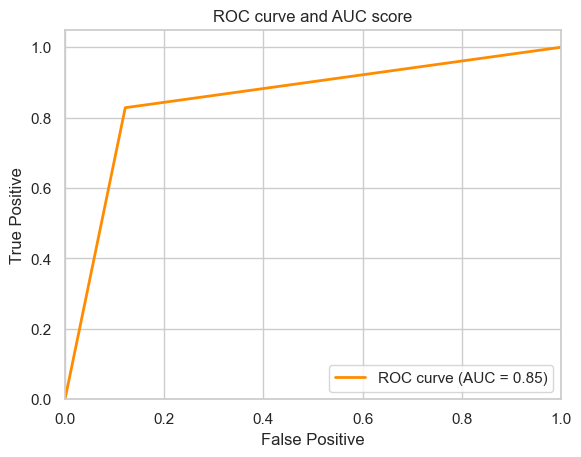

In [91]:
L, M, _ = roc_curve(y_test, y_pred_GB)
roc_auc = auc(L, M)

# Plot the ROC curve 
plt.figure()
plt.plot(L, M, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')


# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC curve and AUC score')
plt.legend(loc='lower right')

# Display the plot
plt.show()

## evaluate the accuracy NGB model by using the Kfold cross validation method

In [93]:
kf=KFold(n_splits=5, shuffle=True, random_state=42)
scoresGNB=cross_val_score(gnb,x_train,y_train,cv=kf,scoring='accuracy')
print (scoresGNB)

[0.85808497 0.85823071 0.86231145 0.86175988 0.8630716 ]


In [95]:
print ('Accuracy of GNB by cross-fold-validation is:', scoresGNB.mean())

Accuracy of GNB by cross-fold-validation is: 0.8606917206986893


In [97]:
#Confusion matrix for GNB model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_GB)

array([[20093,  2779],
       [  365,  1760]], dtype=int64)

## how does our NGB model perform on this data overally? over or underfit 

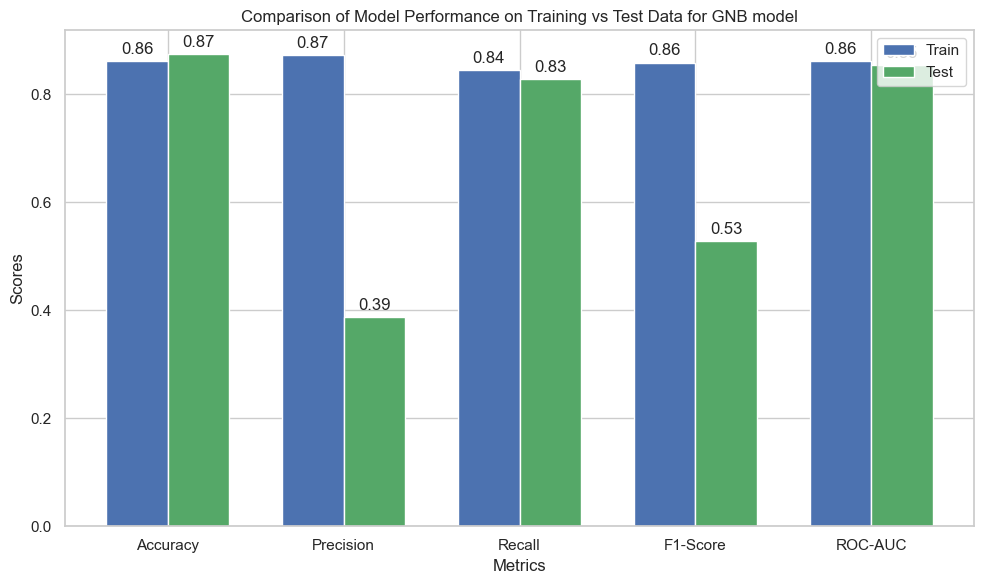

In [189]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Collect the metrics for both training and test sets
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
train_metrics = [accuracy_GNB_train, precision_GNB, recall_GNB, f1_GNB, roc_auc_GNB]
test_metrics = [accuracygnb, precisiongnb, recallgnb, f1gnb, roc_aucgnb]

# Step 2: Create a bar chart to visualize the comparison
x = np.arange(len(metrics))  # Label locations

# Step 3: Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35  # Width of the bars
train_bar = ax.bar(x - bar_width/2, train_metrics, bar_width, label='Train', color='b')
test_bar = ax.bar(x + bar_width/2, test_metrics, bar_width, label='Test', color='g')

# Step 4: Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance on Training vs Test Data for GNB model')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Step 5: Annotate the bars with the values
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset label
                    textcoords="offset points", ha='center', va='bottom')

annotate_bars(train_bar)
annotate_bars(test_bar)

# Step 6: Show the plot
plt.tight_layout()
plt.show()


# Implementing Logistic regression algorithm 

In [99]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(x_train, y_train)

LogisticRegression()

# how the logistic regression algorithm performs on train data

In [167]:
# Calculate the performance metrics on train date for LR
y_train_pred_LR = model_LR.predict(x_train)
accuracy_LR_train = accuracy_score(y_train, y_train_pred_LR)
precision_LR= precision_score (y_train, y_train_pred_LR)
recall_LR=recall_score(y_train, y_train_pred_LR)
f1_LR=f1_score(y_train, y_train_pred_LR)
roc_auc_LR=roc_auc_score(y_train, y_train_pred_LR)

# Print the performance metrics for train data
print(f'Accuracy of the LR model on train data: {accuracy_LR_train:.2f}')
print(f'precision of the LR model on train data: {precision_LR:.2f}')
print(f'recall of the LR model on train data: {recall_LR:.2f}')
print(f'f1 of the LR model on train data: {f1_LR:.2f}')
print(f'roc_auc of the LR model on train data: {roc_auc_LR:.2f}')

Accuracy of the LR model on train data: 0.88
precision of the LR model on train data: 0.88
recall of the LR model on train data: 0.87
f1 of the LR model on train data: 0.88
roc_auc of the LR model on train data: 0.88


 # how the logistic regression algorithm performs on test data

In [101]:
y_pred_LR = model_LR.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_LR)

# Calculate the performance metrics for LR
accuracyLR = accuracy_score(y_test, y_pred_LR)
precisionLR = precision_score (y_test, y_pred_LR)
recallLR=recall_score(y_test, y_pred_LR)
f1LR=f1_score(y_test, y_pred_LR)
roc_aucLR=roc_auc_score(y_test, y_pred_LR)


# Print the performance metrics for LR on test data
print(f'Accuracy of the LR model(train-test split): {accuracyLR:.2f}')
print(f'precision of the LR model(train-test split): {precisionLR:.2f}')
print(f'recall of the LR model(train-test split): {recallLR:.2f}')
print(f'f1 of the LR model(train-test split): {f1LR:.2f}')
print(f'roc_auc of the LR model(train-test split): {roc_aucLR:.2f}')

Accuracy of the LR model(train-test split): 0.88
precision of the LR model(train-test split): 0.41
recall of the LR model(train-test split): 0.85
f1 of the LR model(train-test split): 0.55
roc_auc of the LR model(train-test split): 0.87


# Calculate the ROC score and the AUC curve for LR model

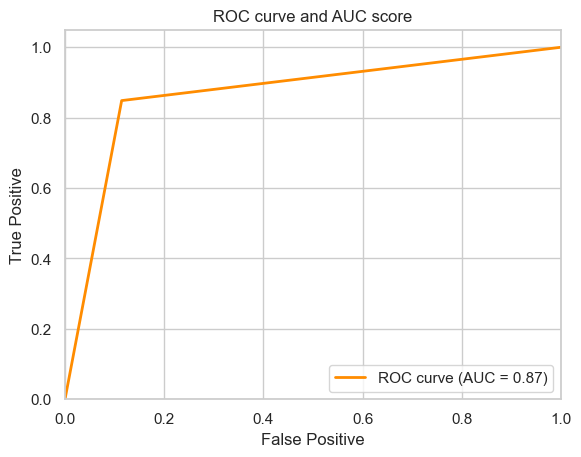

In [103]:
H, K, _ = roc_curve(y_test, y_pred_LR)
roc_auc = auc(H, K)

# Plot the ROC curve with shaded AUC
plt.figure()
plt.plot(H, K, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')


# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC curve and AUC score')
plt.legend(loc='lower right')

# Display the plot
plt.show()

# evaluate the LR accuracy with using Kfold cross validation method

In [105]:
kf=KFold(n_splits=5, shuffle=True, random_state=42)
scoresLR=cross_val_score(model_LR,x_train,y_train,cv=kf,scoring='accuracy')
print (scoresLR)

[0.87561029 0.87517307 0.88085696 0.87935872 0.87739115]


In [107]:
print ('Accuracy of LR by cross-fold-validation is:', scoresGNB.mean())

Accuracy of LR by cross-fold-validation is: 0.8606917206986893


## how does our LR model perform on this data overally? over or underfit 

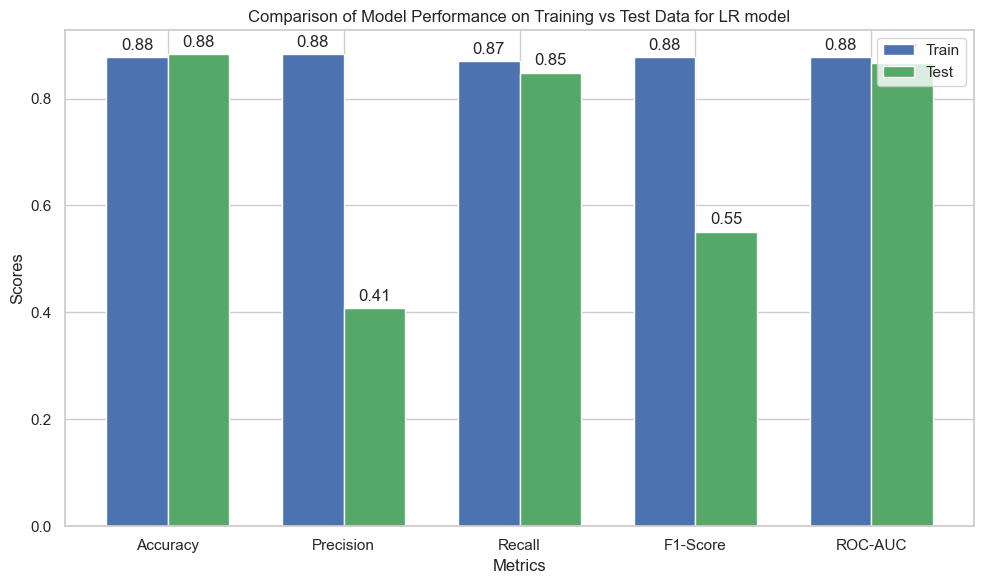

In [191]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Collect the metrics for both training and test sets
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
train_metrics = [accuracy_LR_train, precision_LR, recall_LR, f1_LR, roc_auc_LR]
test_metrics = [accuracyLR, precisionLR, recallLR, f1LR, roc_aucLR]

# Step 2: Create a bar chart to visualize the comparison
x = np.arange(len(metrics))  # Label locations

# Step 3: Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35  # Width of the bars
train_bar = ax.bar(x - bar_width/2, train_metrics, bar_width, label='Train', color='b')
test_bar = ax.bar(x + bar_width/2, test_metrics, bar_width, label='Test', color='g')

# Step 4: Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance on Training vs Test Data for LR model')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Step 5: Annotate the bars with the values
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset label
                    textcoords="offset points", ha='center', va='bottom')

annotate_bars(train_bar)
annotate_bars(test_bar)

# Step 6: Show the plot
plt.tight_layout()
plt.show()

# implement Decission Tree model on Data 

In [109]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

# how does our model perfrom on train data

In [171]:
# Calculate the performance metrics on train date for DT
y_train_pred_DT = model_dt.predict(x_train)
accuracy_DT_train = accuracy_score(y_train, y_train_pred_DT)
precision_DT= precision_score (y_train, y_train_pred_DT)
recall_DT=recall_score(y_train, y_train_pred_DT)
f1_DT=f1_score(y_train, y_train_pred_DT)
roc_auc_DT=roc_auc_score(y_train, y_train_pred_DT)

# Print the performance metrics for train data
print(f'Accuracy of the DT model on train data: {accuracy_DT_train:.2f}')
print(f'precision of the DT model on train data: {precision_DT:.2f}')
print(f'recall of the DT model on train data: {recall_DT:.2f}')
print(f'f1 of the DT model on train data: {f1_DT:.2f}')
print(f'roc_auc of the DT model on train data: {roc_auc_DT:.2f}')

Accuracy of the LR model on train data: 1.00
precision of the LR model on train data: 1.00
recall of the LR model on train data: 1.00
f1 of the LR model on train data: 1.00
roc_auc of the LR model on train data: 1.00


# how does our model perfrom on test data

In [111]:
y_pred_dt = model_dt.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_dt)

# Calculate the performance metrics for Decision tree
accuracydt = accuracy_score(y_test, y_pred_dt)
precisiondt = precision_score (y_test, y_pred_dt)
recalldt=recall_score(y_test, y_pred_dt)
f1dt=f1_score(y_test, y_pred_dt)
roc_aucdt=roc_auc_score(y_test, y_pred_dt)


# Print the performance metrics
print(f'Accuracy of the DT model(train-test split): {accuracydt:.2f}')
print(f'precision of the DT model(train-test split): {precisiondt:.2f}')
print(f'recall of the DT model(train-test split): {recalldt:.2f}')
print(f'f1 of the DT model(train-test split): {f1dt:.2f}')
print(f'roc_auc of the DT model(train-test split): {roc_aucdt:.2f}')

Accuracy of the DT model(train-test split): 0.89
precision of the DT model(train-test split): 0.42
recall of the DT model(train-test split): 0.70
f1 of the DT model(train-test split): 0.52
roc_auc of the DT model(train-test split): 0.80


# Calculate the ROC score and the AUC curve of DT model

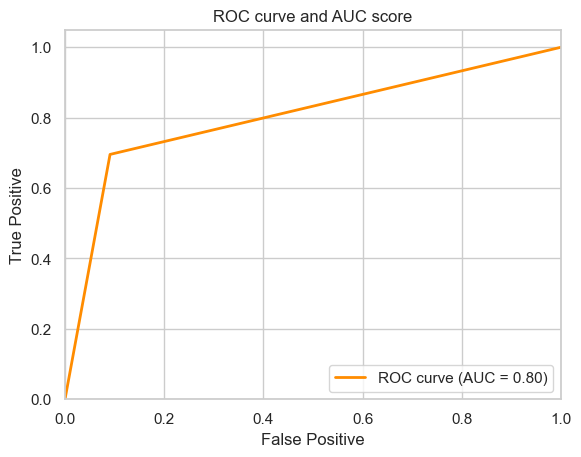

In [125]:
a, z, _ = roc_curve(y_test, y_pred_dt)
roc_auc = auc(a, z)

# Plot the ROC curve with shaded AUC
plt.figure()
plt.plot(a, z, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')


# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC curve and AUC score')
plt.legend(loc='lower right')

# Display the plot
plt.show()

# evaluate DT model through Kfold cross validation method

In [115]:
kf=KFold(n_splits=5, shuffle=True, random_state=42)
scoresDT=cross_val_score(model_dt,x_train,y_train,cv=kf,scoring='accuracy')
print (scoresDT)

[0.91772936 0.92166436 0.92082635 0.92158863 0.91969393]


In [119]:
print ('Accuracy of DT by cross-fold-validation is:', scoresDT.mean())

Accuracy of DT by cross-fold-validation is: 0.9203005267256804


## how does our DT model perform on this data overally? over or underfit 

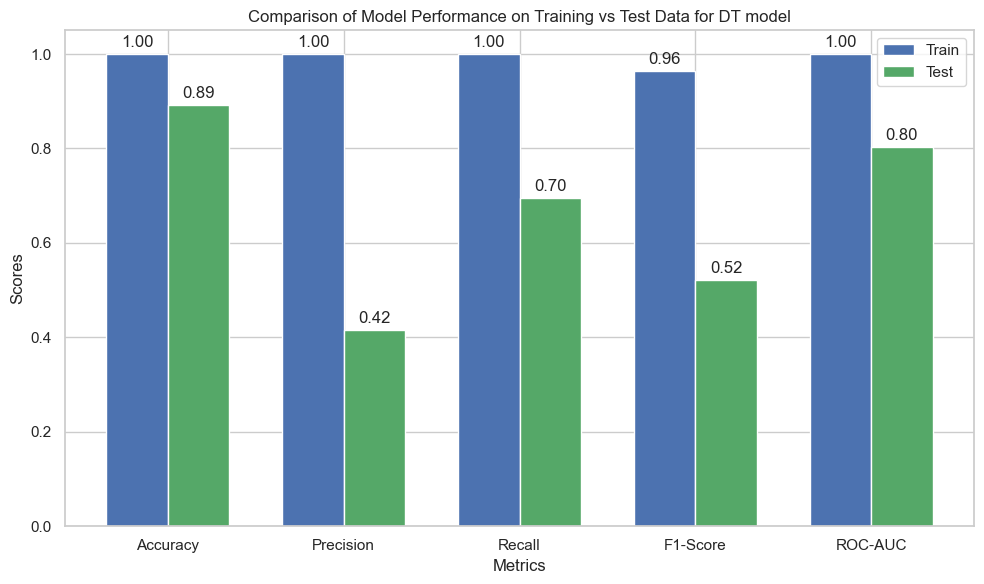

In [195]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Collect the metrics for both training and test sets
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
train_metrics = [accuracy_DT_train, precision_DT, recall_DT, f1_DT, roc_auc_DT]
test_metrics = [accuracydt, precisiondt, recalldt, f1dt, roc_aucdt]

# Step 2: Create a bar chart to visualize the comparison
x = np.arange(len(metrics))  # Label locations

# Step 3: Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35  # Width of the bars
train_bar = ax.bar(x - bar_width/2, train_metrics, bar_width, label='Train', color='b')
test_bar = ax.bar(x + bar_width/2, test_metrics, bar_width, label='Test', color='g')

# Step 4: Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance on Training vs Test Data for DT model')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Step 5: Annotate the bars with the values
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset label
                    textcoords="offset points", ha='center', va='bottom')

annotate_bars(train_bar)
annotate_bars(test_bar)

# Step 6: Show the plot
plt.tight_layout()
plt.show()

# implement the KNN algorithm 

In [121]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)  
model_knn.fit(x_train, y_train)

KNeighborsClassifier()

# Calculate the performance metrics on train date for KNN

In [175]:
# Calculate the performance metrics on train date for KNN
y_train_pred_KNN = model_knn.predict(x_train)
accuracy_KNN_train = accuracy_score(y_train, y_train_pred_KNN)
precision_KNN= precision_score (y_train, y_train_pred_KNN)
recall_KNN=recall_score(y_train, y_train_pred_KNN)
f1_KNN=f1_score(y_train, y_train_pred_KNN)
roc_auc_KNN=roc_auc_score(y_train, y_train_pred_KNN)

# Print the performance metrics for train data
print(f'Accuracy of the KNN model on train data: {accuracy_KNN_train:.2f}')
print(f'precision of the KNN model on train data: {precision_KNN:.2f}')
print(f'recall of the KNN model on train data: {recall_KNN:.2f}')
print(f'f1 of the KNN model on train data: {f1_KNN:.2f}')
print(f'roc_auc of the KNN model on train data: {roc_auc_KNN:.2f}')

Accuracy of the KNN model on train data: 0.96
precision of the KNN model on train data: 0.93
recall of the KNN model on train data: 1.00
f1 of the KNN model on train data: 0.96
roc_auc of the KNN model on train data: 0.96


# Calculate the performance metrics for KNN for the test data

In [123]:
y_pred_KNN = model_knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_KNN)

# Calculate the performance metrics for Decision tree
accuracyKNN = accuracy_score(y_test, y_pred_KNN)
precisionKNN = precision_score (y_test, y_pred_KNN)
recallKNN=recall_score(y_test, y_pred_KNN)
f1KNN=f1_score(y_test, y_pred_KNN)
roc_aucKNN=roc_auc_score(y_test, y_pred_KNN)


# Print the performance metrics
print(f'Accuracy of the KNN model(train-test split): {accuracyKNN:.2f}')
print(f'precision of the KNN model(train-test split): {precisionKNN:.2f}')
print(f'recall of the KNN model(train-test split): {recallKNN:.2f}')
print(f'f1 of the KNN model(train-test split): {f1KNN:.2f}')
print(f'roc_auc of the KNN model(train-test split): {roc_aucKNN:.2f}')

Accuracy of the KNN model(train-test split): 0.88
precision of the KNN model(train-test split): 0.39
recall of the KNN model(train-test split): 0.69
f1 of the KNN model(train-test split): 0.50
roc_auc of the KNN model(train-test split): 0.79


# calculate roc and draw the ROC curve with  AUC for KNN model

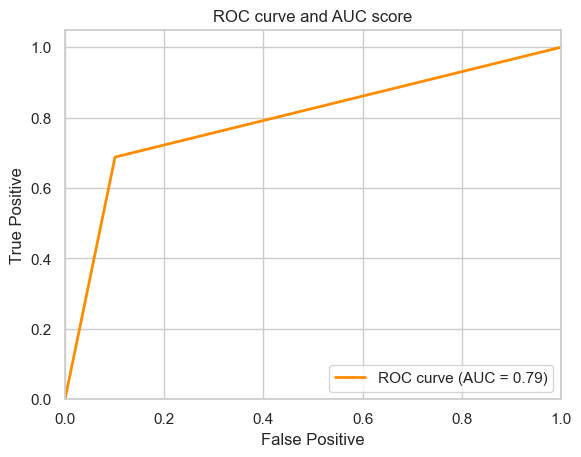

In [129]:
d, c, _ = roc_curve(y_test, y_pred_KNN)
roc_auc = auc(d, c)

# Plot the ROC curve with  AUC
plt.figure()
plt.plot(d, c, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')


# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC curve and AUC score')
plt.legend(loc='lower right')

# Display the plot
plt.show()

# evaluate the accuracy of KNN model by using Kf cross validation method

In [207]:
kf=KFold(n_splits=5, shuffle=True, random_state=42)
scoresKNN=cross_val_score(model_knn,x_train,y_train,cv=kf,scoring='accuracy')
print (scoresKNN)

[0.93711288 0.93725862 0.9402463  0.94024412 0.94057205]


In [209]:
print ('Accuracy of KNN by cross-fold-validation is:', scoresKNN.mean())

Accuracy of KNN by cross-fold-validation is: 0.9390867945505926


## how does our KNN model perform on this data overally? over or underfit 

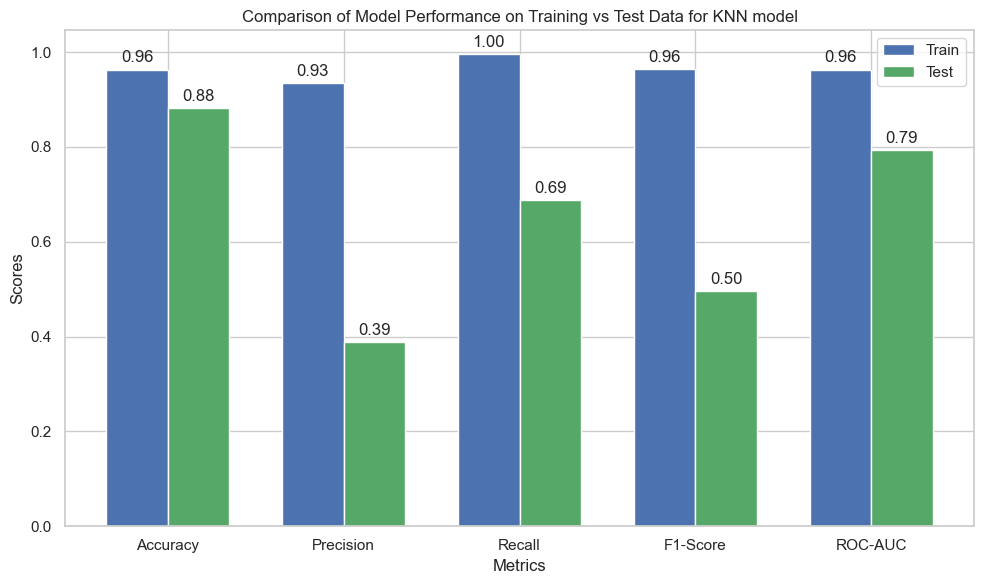

In [197]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Collect the metrics for both training and test sets
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
train_metrics = [accuracy_KNN_train, precision_KNN, recall_KNN, f1_DT, roc_auc_KNN]
test_metrics = [accuracyKNN, precisionKNN, recallKNN, f1KNN, roc_aucKNN]

# Step 2: Create a bar chart to visualize the comparison
x = np.arange(len(metrics))  # Label locations

# Step 3: Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35  # Width of the bars
train_bar = ax.bar(x - bar_width/2, train_metrics, bar_width, label='Train', color='b')
test_bar = ax.bar(x + bar_width/2, test_metrics, bar_width, label='Test', color='g')

# Step 4: Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance on Training vs Test Data for KNN model')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Step 5: Annotate the bars with the values
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset label
                    textcoords="offset points", ha='center', va='bottom')

annotate_bars(train_bar)
annotate_bars(test_bar)

# Step 6: Show the plot
plt.tight_layout()
plt.show()

# Implement the random forest model on our data

In [131]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

# how does the RF model perform on Train data

In [177]:
# Calculate the performance metrics on train date for RF
y_train_pred_RF = model_rf.predict(x_train)
accuracy_RF_train = accuracy_score(y_train, y_train_pred_RF)
precision_RF= precision_score (y_train, y_train_pred_RF)
recall_RF=recall_score(y_train, y_train_pred_RF)
f1_RF=f1_score(y_train, y_train_pred_RF)
roc_auc_RF=roc_auc_score(y_train, y_train_pred_RF)

# Print the performance metrics for train data
print(f'Accuracy of the RF model on train data: {accuracy_RF_train:.2f}')
print(f'precision of the RF model on train data: {precision_RF:.2f}')
print(f'recall of the RF model on train data: {recall_RF:.2f}')
print(f'f1 of the RF model on train data: {f1_RF:.2f}')
print(f'roc_auc of the RF model on train data: {roc_auc_RF:.2f}')

Accuracy of the RF model on train data: 1.00
precision of the RF model on train data: 1.00
recall of the RF model on train data: 1.00
f1 of the RF model on train data: 1.00
roc_auc of the RF model on train data: 1.00


# how does the RF model perform on Test data

In [133]:
y_pred_rf = model_rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_rf)

# Calculate the performance metrics for Decision tree
accuracyrf = accuracy_score(y_test, y_pred_rf)
precisionrf = precision_score (y_test, y_pred_rf)
recallrf=recall_score(y_test, y_pred_rf)
f1rf=f1_score(y_test, y_pred_rf)
roc_aucrf=roc_auc_score(y_test, y_pred_rf)


# Print the performance metrics
print(f'Accuracy of the RF model(train-test split): {accuracyrf:.2f}')
print(f'precision of the RF model(train-test split): {precisionrf:.2f}')
print(f'recall of the RF model(train-test split): {recallrf:.2f}')
print(f'f1 of the RF model(train-test split): {f1rf:.2f}')
print(f'roc_auc of the RF model(train-test split): {roc_aucrf:.2f}')

Accuracy of the RF model(train-test split): 0.93
precision of the RF model(train-test split): 0.57
recall of the RF model(train-test split): 0.72
f1 of the RF model(train-test split): 0.63
roc_auc of the RF model(train-test split): 0.83


# Calculate the ROC score and draw the AUC for RF Model

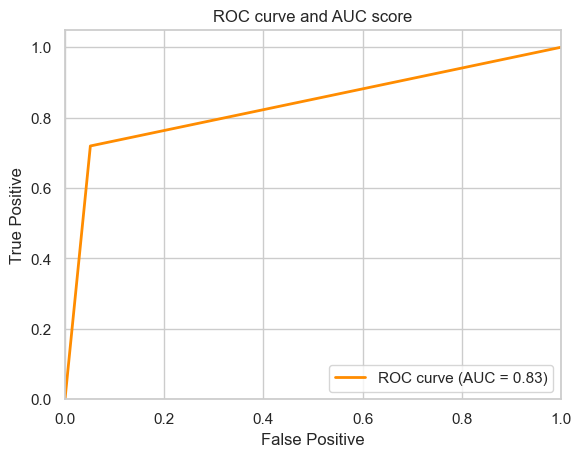

In [135]:
DF, ER, _ = roc_curve(y_test, y_pred_rf)
roc_auc = auc(DF, ER)

# Plot the ROC curve with shaded AUC
plt.figure()
plt.plot(DF, ER, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')


# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC curve and AUC score')
plt.legend(loc='lower right')

# Display the plot
plt.show()

# calculate the accuracy of the RF model, using the KF cross validation model

In [137]:
kf=KFold(n_splits=5, shuffle=True, random_state=42)
scoresRF=cross_val_score(model_rf,x_train,y_train,cv=kf,scoring='accuracy')
print (scoresRF)

[0.95911973 0.96221672 0.96389273 0.96403717 0.9655675 ]


In [147]:
print ('Accuracy of RF by cross-fold-validation is:', scoresRF.mean())

Accuracy of RF by cross-fold-validation is: 0.9826236612698465


## how does our RF model perform on this data overally? over or underfit 

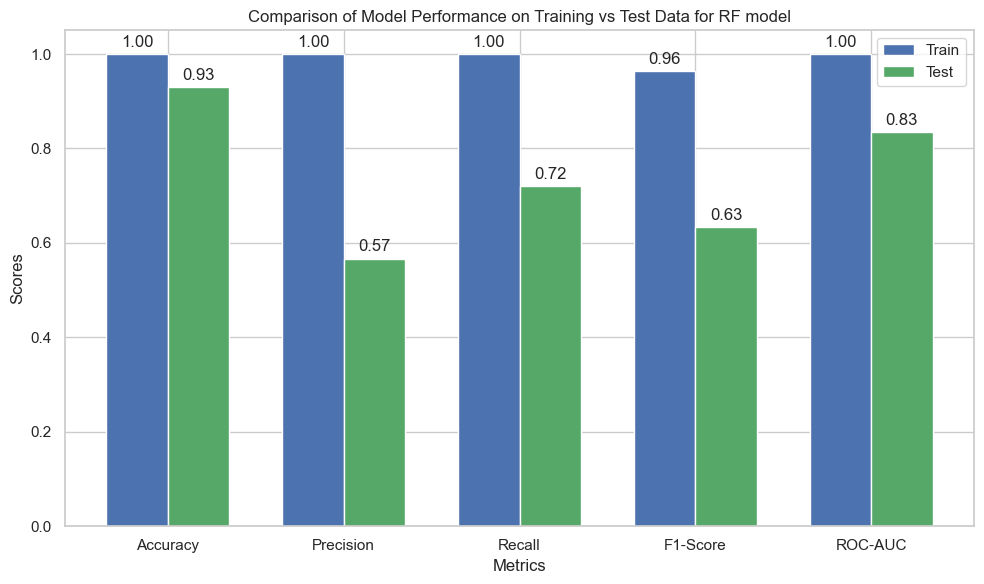

In [201]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Collect the metrics for both training and test sets
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
train_metrics = [accuracy_RF_train, precision_RF, recall_RF, f1_DT, roc_auc_RF]
test_metrics = [accuracyrf, precisionrf, recallrf, f1rf, roc_aucrf]

# Step 2: Create a bar chart to visualize the comparison
x = np.arange(len(metrics))  # Label locations

# Step 3: Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35  # Width of the bars
train_bar = ax.bar(x - bar_width/2, train_metrics, bar_width, label='Train', color='b')
test_bar = ax.bar(x + bar_width/2, test_metrics, bar_width, label='Test', color='g')

# Step 4: Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance on Training vs Test Data for RF model')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Step 5: Annotate the bars with the values
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset label
                    textcoords="offset points", ha='center', va='bottom')

annotate_bars(train_bar)
annotate_bars(test_bar)

# Step 6: Show the plot
plt.tight_layout()
plt.show()

# Implement XGboot algorithm on data

In [149]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier (use_label_encoder=False, eval_metrics='logloss')
model_xgb.fit(x_train, y_train)

C:\Users\Salar\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:25:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              eval_metrics='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

# how does the XGboost model perform on train dataset

In [179]:
# Calculate the performance metrics on train date for XGB
y_train_pred_XGB = model_xgb.predict(x_train)
accuracy_XGB_train = accuracy_score(y_train, y_train_pred_XGB)
precision_XGB= precision_score (y_train, y_train_pred_XGB)
recall_XGB=recall_score(y_train, y_train_pred_XGB)
f1_XGB=f1_score(y_train, y_train_pred_XGB)
roc_auc_XGB=roc_auc_score(y_train, y_train_pred_XGB)

# Print the performance metrics for train data
print(f'Accuracy of the XGB model on train data: {accuracy_XGB_train:.2f}')
print(f'precision of the XGB model on train data: {precision_XGB:.2f}')
print(f'recall of the XGB model on train data: {recall_XGB:.2f}')
print(f'f1 of the XGB model on train data: {f1_XGB:.2f}')
print(f'roc_auc of the XGB model on train data: {roc_auc_XGB:.2f}')

Accuracy of the XGB model on train data: 0.96
precision of the XGB model on train data: 0.95
recall of the XGB model on train data: 0.97
f1 of the XGB model on train data: 0.96
roc_auc of the XGB model on train data: 0.96


# how does the XGboost model perform on test dataset

In [151]:
y_pred_xgb = model_xgb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_xgb)

# Calculate the performance metrics for Decision tree
accuracyxgb = accuracy_score(y_test, y_pred_xgb)
precisionxgb = precision_score (y_test, y_pred_xgb)
recallxgb=recall_score(y_test, y_pred_xgb)
f1xgb=f1_score(y_test, y_pred_xgb)
roc_aucxgb=roc_auc_score(y_test, y_pred_xgb)


# Print the performance metrics
print(f'Accuracy of the XGB model(train-test split): {accuracyxgb:.2f}')
print(f'precision of the XGB model(train-test split): {precisionxgb:.2f}')
print(f'recall of the XGB model(train-test split): {recallxgb:.2f}')
print(f'f1 of the XGB model(train-test split): {f1xgb:.2f}')
print(f'roc_auc of the XGB model(train-test split): {roc_aucxgb:.2f}')

Accuracy of the XGB model(train-test split): 0.91
precision of the XGB model(train-test split): 0.49
recall of the XGB model(train-test split): 0.78
f1 of the XGB model(train-test split): 0.60
roc_auc of the XGB model(train-test split): 0.85


# calculate the ROC scorce and draw the AUC for XGboost

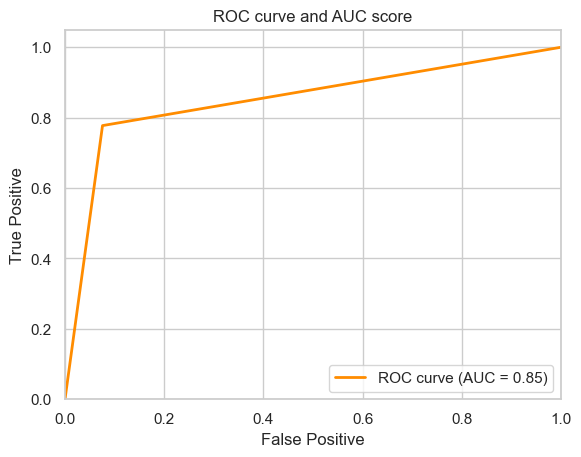

In [153]:
jh, hj, _ = roc_curve(y_test, y_pred_xgb)
roc_auc = auc(jh, hj)

# Plot the ROC curve 
plt.figure()
plt.plot(jh, hj, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')


# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC curve and AUC score')
plt.legend(loc='lower right')

# Display the plot
plt.show()

# evaluate the accuracy of the XGboost model through using the KF cross validation method

In [ ]:
kf=KFold(n_splits=5, shuffle=True, random_state=42)
scoresXGB=cross_val_score(model_xgb,x_train,y_train,cv=kf,scoring='accuracy')
print (scoresXGB)

In [157]:
print ('Accuracy of XGB by cross-fold-validation is:', scoresXGB.mean())

Accuracy of XGB by cross-fold-validation is: 0.9410470325559004


## how does our XGboost model perform on this data overally? over or underfit 

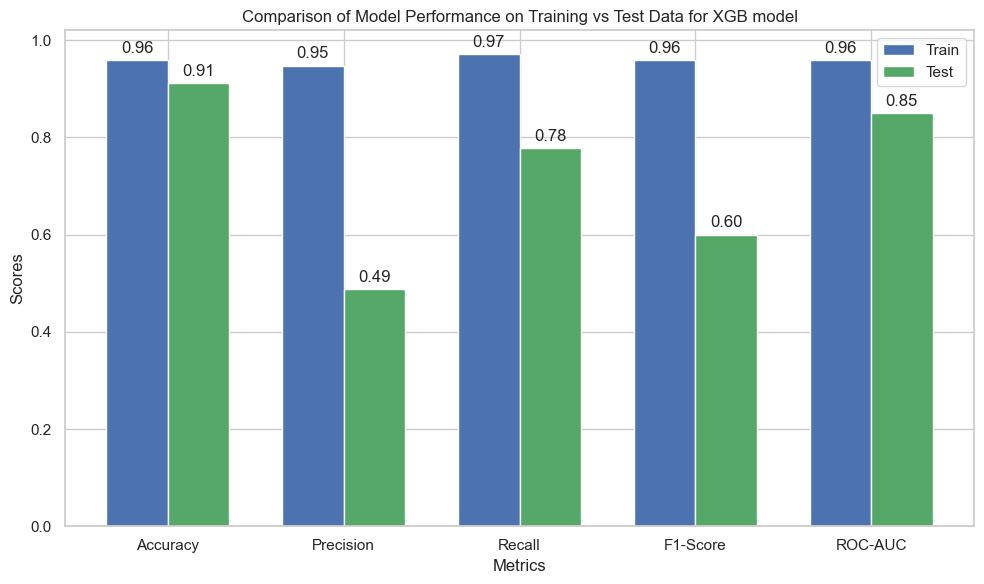

In [205]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Collect the metrics for both training and test sets
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
train_metrics = [accuracy_XGB_train, precision_XGB, recall_XGB, f1_XGB, roc_auc_XGB]
test_metrics = [accuracyxgb, precisionxgb, recallxgb, f1xgb, roc_aucxgb]

# Step 2: Create a bar chart to visualize the comparison
x = np.arange(len(metrics))  # Label locations

# Step 3: Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35  # Width of the bars
train_bar = ax.bar(x - bar_width/2, train_metrics, bar_width, label='Train', color='b')
test_bar = ax.bar(x + bar_width/2, test_metrics, bar_width, label='Test', color='g')

# Step 4: Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance on Training vs Test Data for XGB model')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Step 5: Annotate the bars with the values
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset label
                    textcoords="offset points", ha='center', va='bottom')

annotate_bars(train_bar)
annotate_bars(test_bar)

# Step 6: Show the plot
plt.tight_layout()
plt.show()

# Lets compare the Cross Validation accuracy of all of above Models !

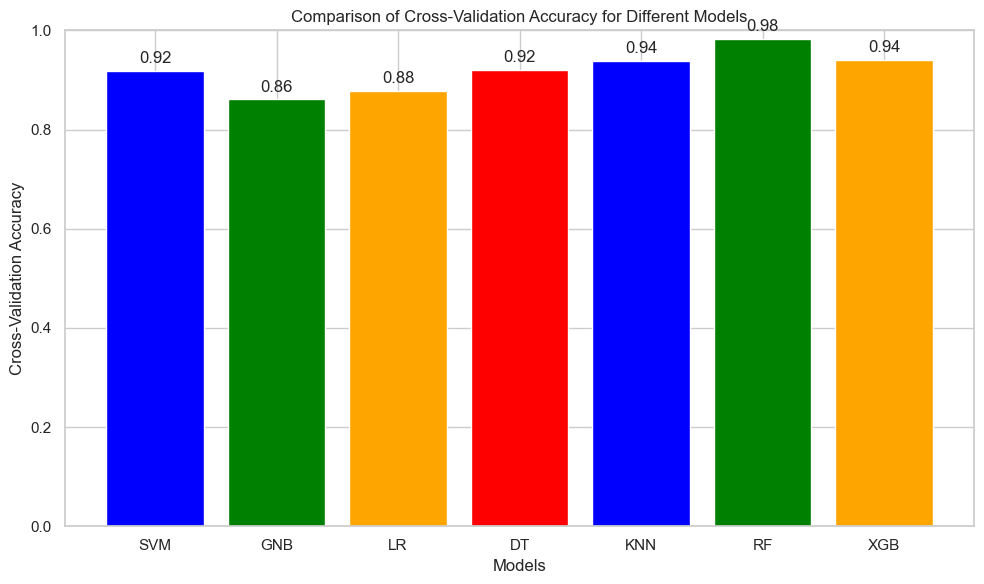

In [211]:
import matplotlib.pyplot as plt

# Step 1: Store the mean cross-validation accuracy for each model
model_names = ['SVM', 'GNB', 'LR', 'DT','KNN','RF','XGB']  # Add your model names
cv_accuracies = [scores.mean(), scoresGNB.mean(), scoresLR.mean(), scoresDT.mean(),scoresKNN.mean(),scoresRF.mean(),scoresXGB.mean() ]  # Replace with your actual scores

# Step 2: Create a bar chart to compare the cross-validation accuracy
plt.figure(figsize=(10, 6))

# Plot the accuracies for each model
plt.bar(model_names, cv_accuracies, color=['blue', 'green', 'orange', 'red'])

# Step 3: Add labels, title, and grid for readability
plt.xlabel('Models')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Comparison of Cross-Validation Accuracy for Different Models')
plt.ylim([0, 1])  # Accuracy values typically range from 0 to 1
plt.grid(True, axis='y')

# Annotate each bar with the accuracy value
for i, v in enumerate(cv_accuracies):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()
